In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from os import listdir

plt.style.use("packages/mystyle.mplstyle")

In [26]:
datasets_names = [
    f[:-4]
    for f in listdir("data")
    if f
    not in [
        ".DS_Store",
        "Misure accel grav giorno2.xlsx",
        "~$Misure accel grav giorno2.xlsx",
        "misure fototraguardo, angoli diversi, 3-5-7-10-15 gradi.csv",
        "Pendolo.xlsx",
    ]
]

datasets_names.sort()

# print(datasets_names)

In [27]:
datasets = {}
massa_gancio = 19.88
massa_masse = 79.56
massa_tot = 19.88 + 79.56
lunghezze = (
    np.array(
        [
            206.10,
            172.58,
            172.58,
            127.46,
            127.06,
            128.24,
            99.06,
            99.08,
            99.22,
            67.56,
            67.86,
            67.90,
        ]
    )
    / 1000
)

for dataset_name in datasets_names:
    with open(f"data/{dataset_name}.csv", "r") as file:
        datasets[dataset_name] = pd.read_csv(file, sep=";", decimal=",").dropna()

In [28]:
# Calculate center of mass

altezza_base_gancio = 71.38 / 1000
altezza_masse = 21.28 / 1000

cm = (altezza_base_gancio * massa_gancio + altezza_masse * massa_masse) / massa_tot

lunghezze = lunghezze - cm

misura fototraguardo lunghezza 1(min)    mean periods: 1.2387 ± 0.0004 mean squared: 1.5344±0.0010
misura fototraguardo lunghezza 2_mat     mean periods: 1.2927 ± 0.0003 mean squared: 1.6711±0.0007
misura fototraguardo lunghezza 2_tia     mean periods: 1.2931 ± 0.0002 mean squared: 1.6722±0.0006
misura fototraguardo lunghezza 3_fil     mean periods: 1.3631 ± 0.0003 mean squared: 1.8582±0.0007
misura fototraguardo lunghezza 3_mat     mean periods: 1.3622 ± 0.0002 mean squared: 1.8557±0.0005
misura fototraguardo lunghezza 3_tia     mean periods: 1.3620 ± 0.0002 mean squared: 1.8551±0.0005
misura fototraguardo lunghezza 4_fil     mean periods: 1.4018 ± 0.0002 mean squared: 1.9649±0.0006
misura fototraguardo lunghezza 4_mat     mean periods: 1.4023 ± 0.0002 mean squared: 1.9665±0.0007
misura fototraguardo lunghezza 4_tia     mean periods: 1.4033 ± 0.0002 mean squared: 1.9692±0.0005
misura fototraguardo lunghezza 5_fil     mean periods: 1.4471 ± 0.0002 mean squared: 2.0941±0.0006
misura fot

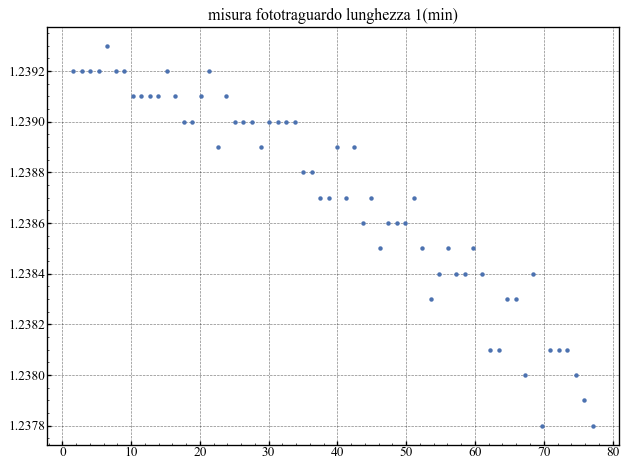

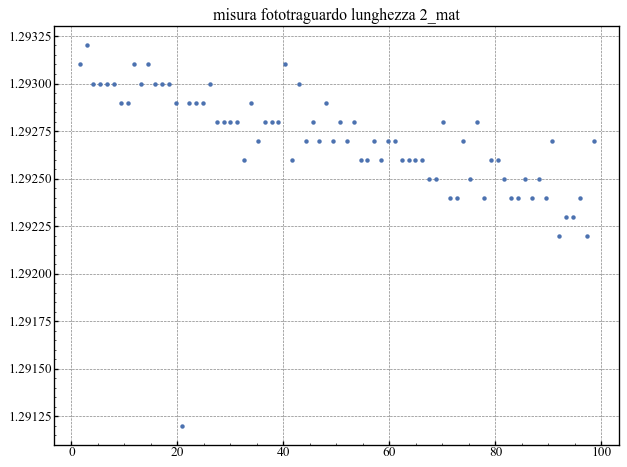

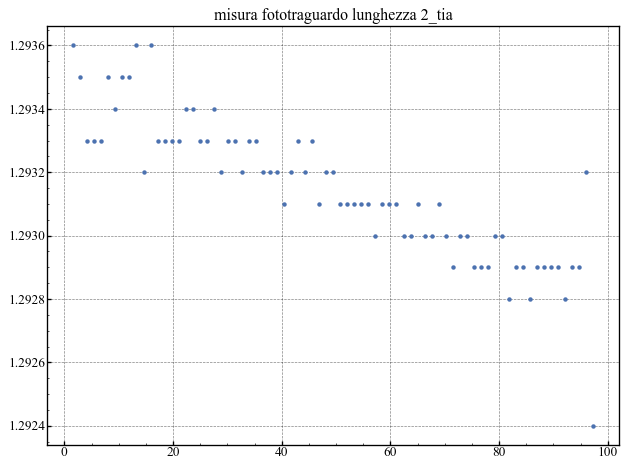

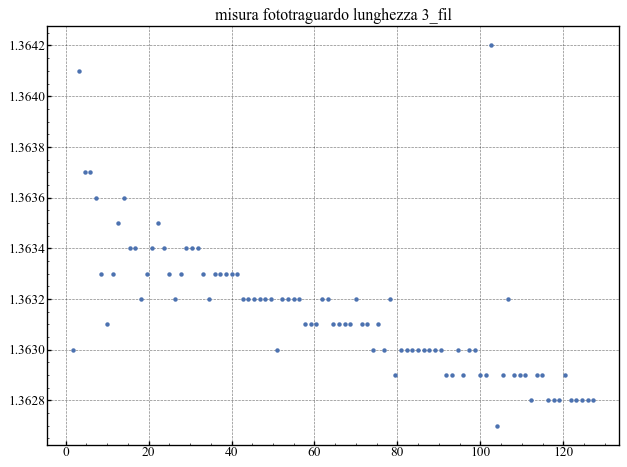

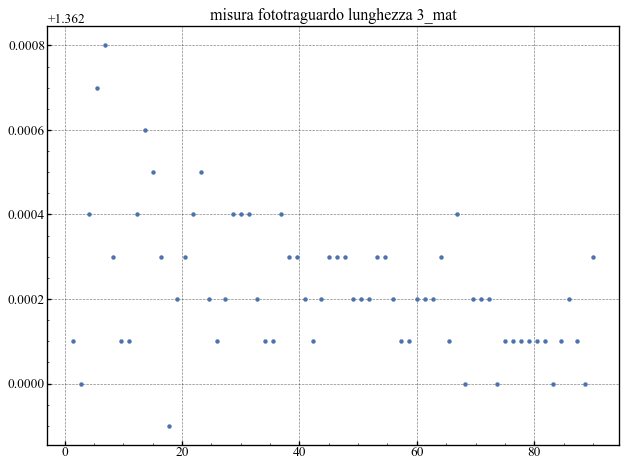

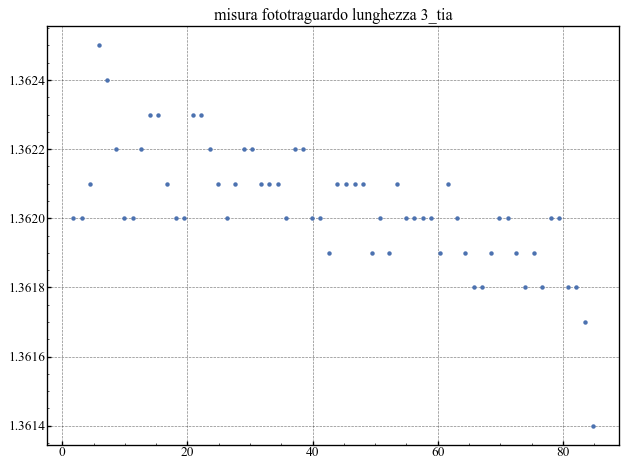

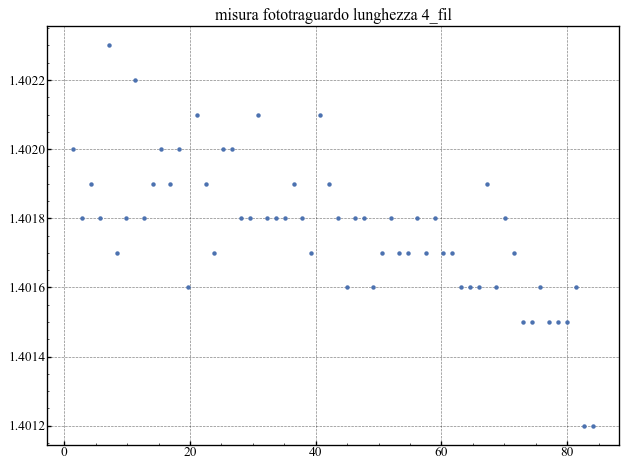

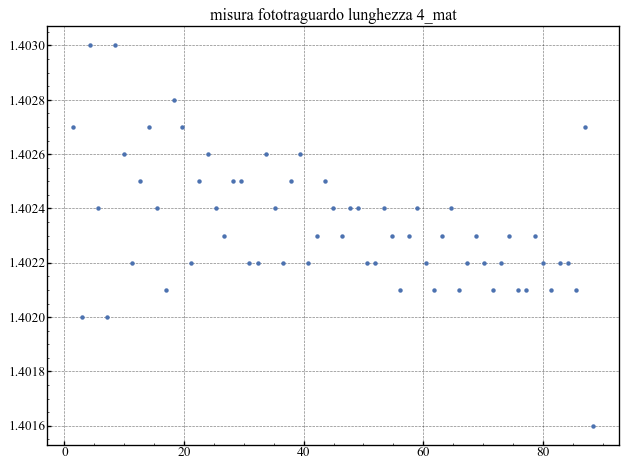

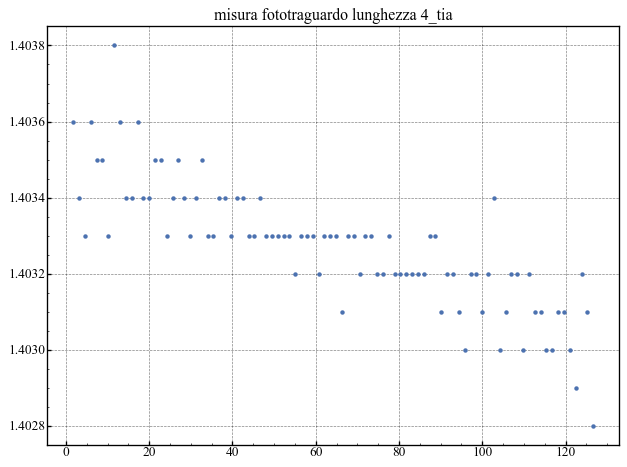

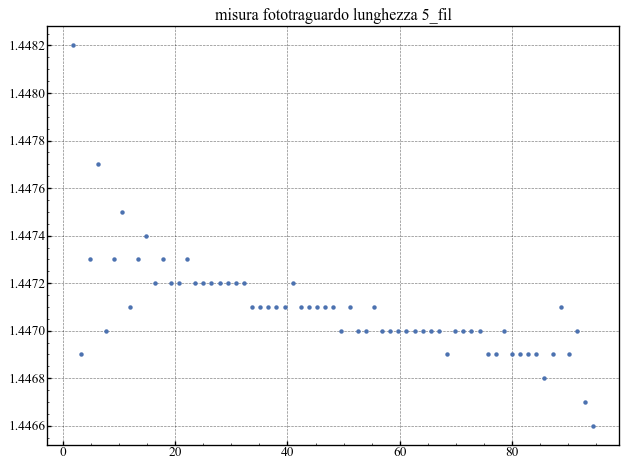

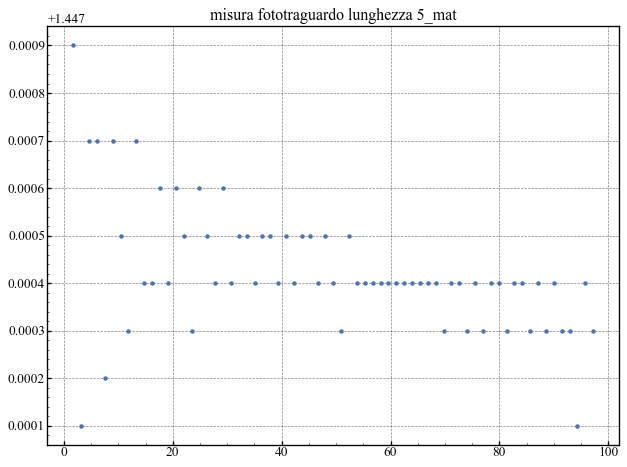

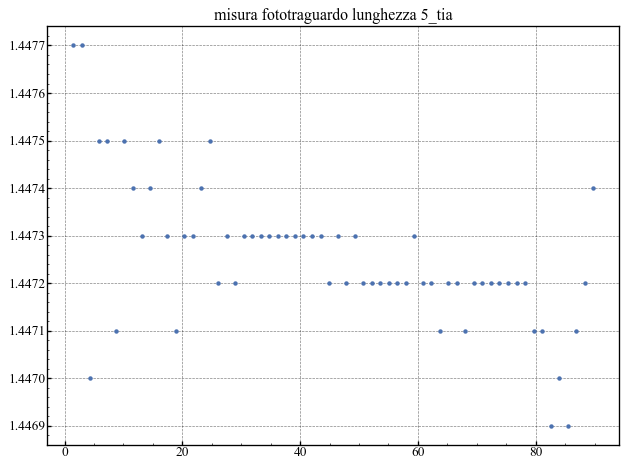

In [29]:
periods = []
std_periods = []

for dataset_name, dataset in datasets.items():
    fig, ax = plt.subplots()
    X = dataset.iloc[:, 0].to_numpy()
    Y = dataset.iloc[:, 1].to_numpy()

    mean_period = Y.mean()
    std_period = Y.std()

    print(
        f"{dataset_name:<40}",
        f"mean periods: {mean_period:.4f} ± {std_period:.4f}",
        f"mean squared: {mean_period**2:.4f}±{2*std_period*mean_period:.4f}",
    )
    periods.append(mean_period)
    std_periods.append(std_period)

    ax.set_title(dataset_name)
    ax.scatter(X, Y)

periods = np.array(periods)
std_periods = np.array(std_periods)

parameters: -4.0293±0.0044 2.2419±0.0004
g=9.7979 ±0.0108


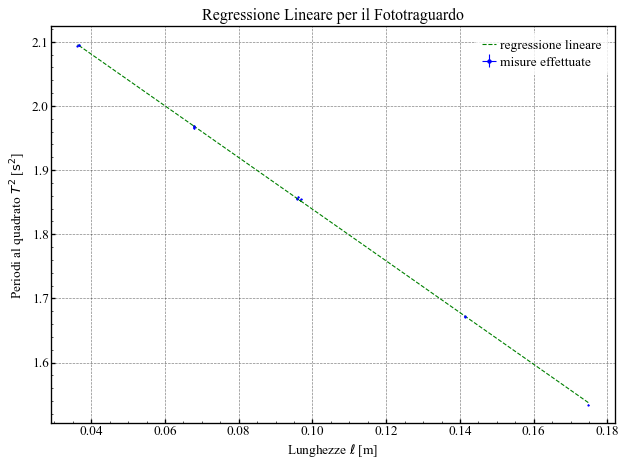

In [30]:
squared_periods = np.square(periods) * (
    1 + (0.005 / (2 * np.pi)) ** 2  # correzione smorzamento (inutile)
)
squared_p_std = 2 * np.multiply(std_periods, periods)
xerr = 0.2 / 1000
err = np.sqrt(np.square(squared_p_std) + np.square(xerr))

plt.errorbar(
    lunghezze,
    squared_periods,
    fmt="b. ",
    yerr=squared_p_std,
    xerr=xerr,
    label="misure effettuate",
)

retta = lambda x, a, b: a * x + b

params, cov = scipy.optimize.curve_fit(
    retta, lunghezze, squared_periods, sigma=err, absolute_sigma=True
)
std = np.sqrt(np.diag(cov))

print("parameters:", *[f"{param:.4f}±{err:.4f}" for param, err in zip(params, std)])
g = -(4 * np.pi**2) / params[0]
g_std = -std[0] / params[0] * g
print(f"{g=:.4f} ±{g_std:.4f}")

plt.plot(
    lunghezze, retta(lunghezze, *params), ls="--", c="g", label="regressione lineare"
)

plt.title("Regressione Lineare per il Fototraguardo")
plt.xlabel(r"Lunghezze $\ell$ [m]")
plt.ylabel(r"Periodi al quadrato $T^2$ [$\text{s}^2$]")
plt.legend()

plt.savefig("images/Regressione Lineare Fototraguardo.png")

[9.69378377e-02 5.08494926e-05 1.40080460e+00] [2.11374897e+00 1.11770254e-03 2.11379428e+00]
[8.40585417e-04 4.53428361e-03 1.49799331e+00] [0.00020439 0.00211546 0.00022791]
[0.00272833 0.00328015 1.49746495] [0.0004596  0.00087977 0.00048822]
[0.00489329 0.00412843 1.49787799] [0.00011511 0.00018244 0.00012766]
[0.00985116 0.00502419 1.49903239] [7.64621300e-05 7.98780959e-05 8.68871363e-05]


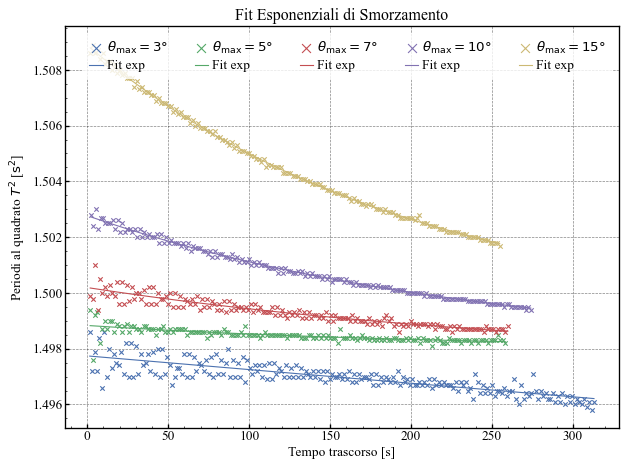

In [31]:
exp_func = lambda x, a, b, c: a * np.exp(-b * x) + c

with open(
    "data/misure fototraguardo, angoli diversi, 3-5-7-10-15 gradi.csv", "r"
) as file:
    data = pd.read_csv(file, delimiter=";", decimal=",").iloc[0:]

angles_used = [3, 5, 7, 10, 15]

for i in range(0, 10, 2):
    X = data.iloc[:, i].dropna().to_numpy()
    Y = data.iloc[:, i + 1].dropna().to_numpy()
    plt.scatter(
        X, Y, marker="x", label=rf"$\theta_\text{{max}} = {angles_used[i//2]}°$"
    )

    params, cov = scipy.optimize.curve_fit(
        exp_func,
        X,
        Y,
        p0=[0.001, 0.001, 1.5],
        maxfev=3000,
        bounds=((0, 0, 1.4), (10, 1, 1.6)),
    )
    std = np.sqrt(np.diag(cov))

    print(params, std)
    plt.plot(X, exp_func(X, *params), label="Fit exp")

plt.title("Fit Esponenziali di Smorzamento")
plt.xlabel(r"Tempo trascorso [s]")
plt.ylabel(r"Periodi al quadrato $T^2$ [$\text{s}^2$]")
plt.legend(ncol=5)
plt.savefig("images/Fit Esponenziale per Angoli Diversi.png")

Riaggiungendo il massimo smorzamento (0.005) ai periodi sopra cambia solo il sesto decimale, quindi possiamo trascurare lo smorzamento

## Parte col cronometro

parameters: -3.9907±0.0705 2.3625±0.0096
g=9.8926 ±0.1747


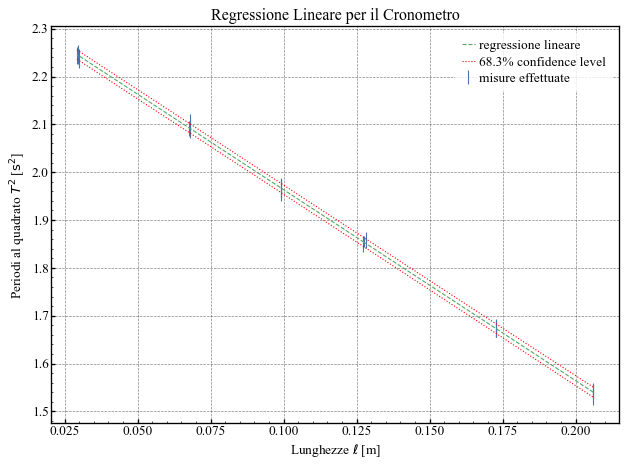

In [32]:
lunghezze = (
    np.array(
        [
            206.10,
            206.10,
            206.10,
            172.58,
            172.58,
            172.58,
            128.24,
            127.06,
            127.46,
            99.22,
            99.08,
            99.06,
            67.90,
            67.86,
            67.56,
            30.00,
            29.60,
            29.20,
        ]
    )
    / 1000
)
periodi_quadri = np.array(
    [
        1.535,
        1.540,
        1.543,
        1.672,
        1.674,
        1.672,
        1.858,
        1.850,
        1.855,
        1.963,
        1.963,
        1.968,
        2.103,
        2.091,
        2.091,
        2.238,
        2.247,
        2.244,
    ]
)
errore_periodi = np.array(
    [
        0.171,
        0.114,
        0.119,
        0.134,
        0.148,
        0.129,
        0.134,
        0.133,
        0.093,
        0.137,
        0.182,
        0.152,
        0.148,
        0.150,
        0.121,
        0.150,
        0.153,
        0.141,
    ]
) / np.sqrt(59)
params, cov = scipy.optimize.curve_fit(
    retta, lunghezze, periodi_quadri, sigma=errore_periodi, absolute_sigma=True
)
std = np.sqrt(np.diag(cov))

plt.errorbar(
    lunghezze, periodi_quadri, errore_periodi, ls="", label="misure effettuate"
)
plt.plot(lunghezze, retta(lunghezze, *params), ls="--", label="regressione lineare")

x_plot = np.linspace(min(lunghezze), max(lunghezze), 1000)

plt.plot(
    x_plot,
    np.multiply(params[0], x_plot)
    + params[1]
    - std[1]
    - np.square(np.linspace(-std[0], std[0], 1000)) * x_plot,
    ls=":",
    c="r",
    label=r"68.3% confidence level",
)
plt.plot(
    x_plot,
    np.multiply(params[0], x_plot)
    + params[1]
    + std[1]
    + np.square(np.linspace(-std[0], std[0], 1000)) * x_plot,
    ls=":",
    c="r",
)
plt.legend()


print("parameters:", *[f"{param:.4f}±{err:.4f}" for param, err in zip(params, std)])
g = -(4 * np.pi**2) / params[0]
g_std = -std[0] / params[0] * g
print(f"{g=:.4f} ±{g_std:.4f}")


plt.title("Regressione Lineare per il Cronometro")
plt.xlabel(r"Lunghezze $\ell$ [m]")
plt.ylabel(r"Periodi al quadrato $T^2$ [$\text{s}^2$]")

plt.savefig("images/Regressione Lineare Cronometro.png")